<h1 align='center'>Multiple and Polynomial Regression</h1>


We will use the Boston Housing Dataset to explore how to build a regression model in this case.

In [1]:
%pylab inline
pylab.style.use('ggplot')
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
dir(boston)

['DESCR', 'data', 'feature_names', 'target']

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [14]:
columns = [name for name in boston.feature_names] + ['MEDV']
columns

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [23]:
data = np.column_stack([boston.data, boston.target])

In [24]:
data_df = pd.DataFrame(data=data, columns=columns)

In [25]:
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
data_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [28]:
pd.unique(data_df.RAD)

array([  1.,   2.,   3.,   5.,   4.,   8.,   6.,   7.,  24.])

In [29]:
pd.unique(data_df.CHAS)

array([ 0.,  1.])

In [36]:
gp_chas = data_df.MEDV.groupby(data_df.CHAS)
gp_chas.agg({'min': np.min, 'max': np.max, 'mean': np.mean})

,min,max,mean
CHAS,,,
0.0,5.0,50.0,22.093843
1.0,13.4,50.0,28.440000


In [37]:
gp_rad = data_df.MEDV.groupby(data_df.RAD)
gp_rad.agg({'min': np.min, 'max': np.max, 'mean': np.mean})

,min,max,mean
RAD,,,
1.0,11.9,50.0,24.365000
2.0,15.7,43.8,26.833333
3.0,14.4,50.0,27.928947
4.0,7.0,50.0,21.387273
5.0,11.8,50.0,25.706957
6.0,16.8,24.8,20.976923
7.0,17.6,42.8,27.105882
8.0,16.0,50.0,30.358333
24.0,5.0,50.0,16.403788


In [38]:
data_df[['CHAS', 'MEDV']].corr()

,CHAS,MEDV
CHAS,1.00000,0.17526
MEDV,0.17526,1.00000


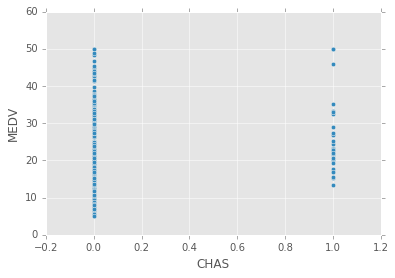

In [39]:
data_df.plot(kind='scatter', x='CHAS', y='MEDV')

In [68]:
corrs_with_medv = data_df.drop(['CHAS', 'RAD', 'MEDV'], axis=1).corrwith(data_df['MEDV'])
corrs_with_medv.reindex(corrs_with_medv.abs().sort_values(ascending=False).index)

LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
dtype: float64

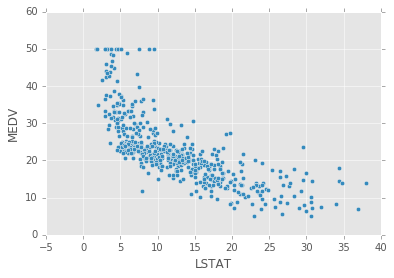

In [41]:
data_df.plot(kind='scatter', x='LSTAT', y='MEDV')

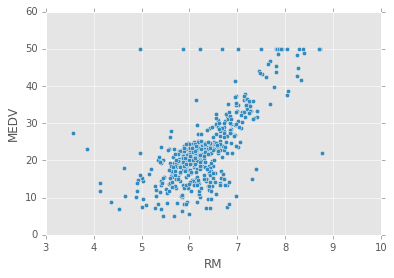

In [42]:
data_df.plot(kind='scatter', x='RM', y='MEDV')

In [51]:
import statsmodels.formula.api as sm
result = sm.ols(formula='MEDV ~ RM + LSTAT', data=data_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sat, 01 Apr 2017   Prob (F-statistic):          7.01e-112
Time:                        01:35:28   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
result = sm.ols(formula='MEDV ~ RM + np.log(LSTAT)', data=data_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     607.2
Date:                Sat, 01 Apr 2017   Prob (F-statistic):          7.40e-135
Time:                        01:36:09   Log-Likelihood:                -1529.6
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     503   BIC:                             3078.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.8865      3.552      6.443      0.000      15.908      29.865
RM                3.5977      0.423      8.512      0.000       2.767       4.428
np.log(LSTAT)    -9.6855      0.494    -19.597      0.000     -10.656      -8.714
==============================================================================
Omnibus:                      130.413   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.915
Skew:                           1.185   Prob(JB):                     2.41e-92
Kurtosis:                       6.794   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

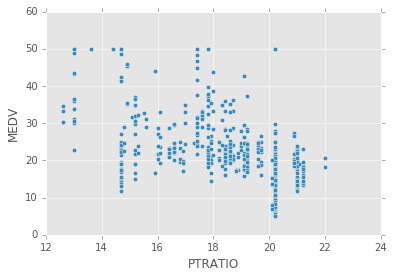

In [56]:
data_df.plot(kind='scatter', x='PTRATIO', y='MEDV')

In [61]:
result = sm.ols(formula='MEDV ~ PTRATIO + RM + np.log(LSTAT)', data=data_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     460.2
Date:                Sat, 01 Apr 2017   Prob (F-statistic):          1.25e-143
Time:                        01:40:06   Log-Likelihood:                -1505.8
No. Observations:                 506   AIC:                             3020.
Df Residuals:                     502   BIC:                             3037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        36.9118      3.936      9.377      0.000      29.178      44.646
PTRATIO          -0.7619      0.108     -7.026      0.000      -0.975      -0.549
RM                3.2682      0.406      8.041      0.000       2.470       4.067
np.log(LSTAT)    -8.7967      0.489    -18.000      0.000      -9.757      -7.837
==============================================================================
Omnibus:                      181.197   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              905.545
Skew:                           1.502   Prob(JB):                    2.31e-197
Kurtosis:                       8.825   Cond. No.                         370.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

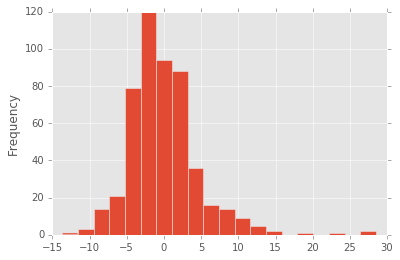

In [63]:
result.resid.plot(kind='hist', bins=20)